# Notebook 3: Option Trading with ML
## Feature Selection
What could possibly go wrong?
5/10/2020

First you scale
Feature Selection and Reduction

Feature selection and reduction is a critical step in designing a machine learning project.

Bad feature sets cause many problems.
Overfitting
Slower training and testing

Good feature sets create many benefits.
Fast training and testing.
Better human insights

Several methods of feature selection and reduction.
Univariate Testing
Correlation table with heat map - seaborn and cor
Testing feature combinations with a Learner


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing     import StandardScaler
from sklearn.decomposition     import PCA


raw_features = pd.read_csv('opt_sample.csv', index_col = 0)

# Remove duplicate features

dup_features = ['STO_open_strike_delta%', 'stock_price_at_open']


print(raw_features.shape)
#print(raw_features['label'])
#features_np = raw_features.copy()
features_np = raw_features.to_numpy(copy = True)
#print('features_np')
#print(features_np)
#print(type(features_np))
scaler = StandardScaler()
features = scaler.fit_transform(features_np)
#print(features)
#print(features.head())
#print(features.columns.tolist())

X_train = features[:,:26]  #independent features (columns)
#print('X_train')
#print(X_train.head(5))
y_train = features[:,-1]    #label column
#print('y_train')
#print(y_train.head())

#apply SelectKBest class to measure and rank features.

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)
feature_scores = pd.DataFrame(fit.scores_)
feature_columns = pd.DataFrame(raw_features.columns)
#print('feature_columns')
#print(feature_columns)

#print(feature_scores.head(5), feature_columns.head(5))

feature_scores = pd.concat([feature_scores, feature_columns],axis=1)
#print(feature_scores.head(8))
feature_scores.columns = ['Score', 'Feature']
#print(feature_scores.head(5))
feature_scores.sort_values(['Score'], ascending = False, inplace = True)
feature_scores = feature_scores.reset_index(drop = True)
feature_scores['Score'] = round(feature_scores['Score']) 
print(feature_scores)


(8000, 29)
     Score                   Feature
0   1692.0                STO_strike
1   1550.0                30 day SMA
2   1443.0   STO_offer_strike_delta%
3   1292.0                45 day SMA
4   1073.0                15 day SMA
5    973.0                3 days old
6    968.0                10 day SMA
7    950.0             STO_offer_ARR
8    942.0                4 days old
9    881.0                2 days old
10   861.0                5 days old
11   849.0              STO_ask_fee%
12   836.0       stock_price_at_open
13   829.0                1 days old
14   816.0  stock_price_at_STO_offer
15   628.0                45 day vel
16   439.0                Yearly Min
17   216.0                      MACD
18    50.0                       MFI
19    30.0                30 day vel
20    28.0             STO_days_long
21    10.0                       RSI
22     9.0                10 day vel
23     6.0                Yearly Max
24     3.0                 5 day vel
25     3.0                1

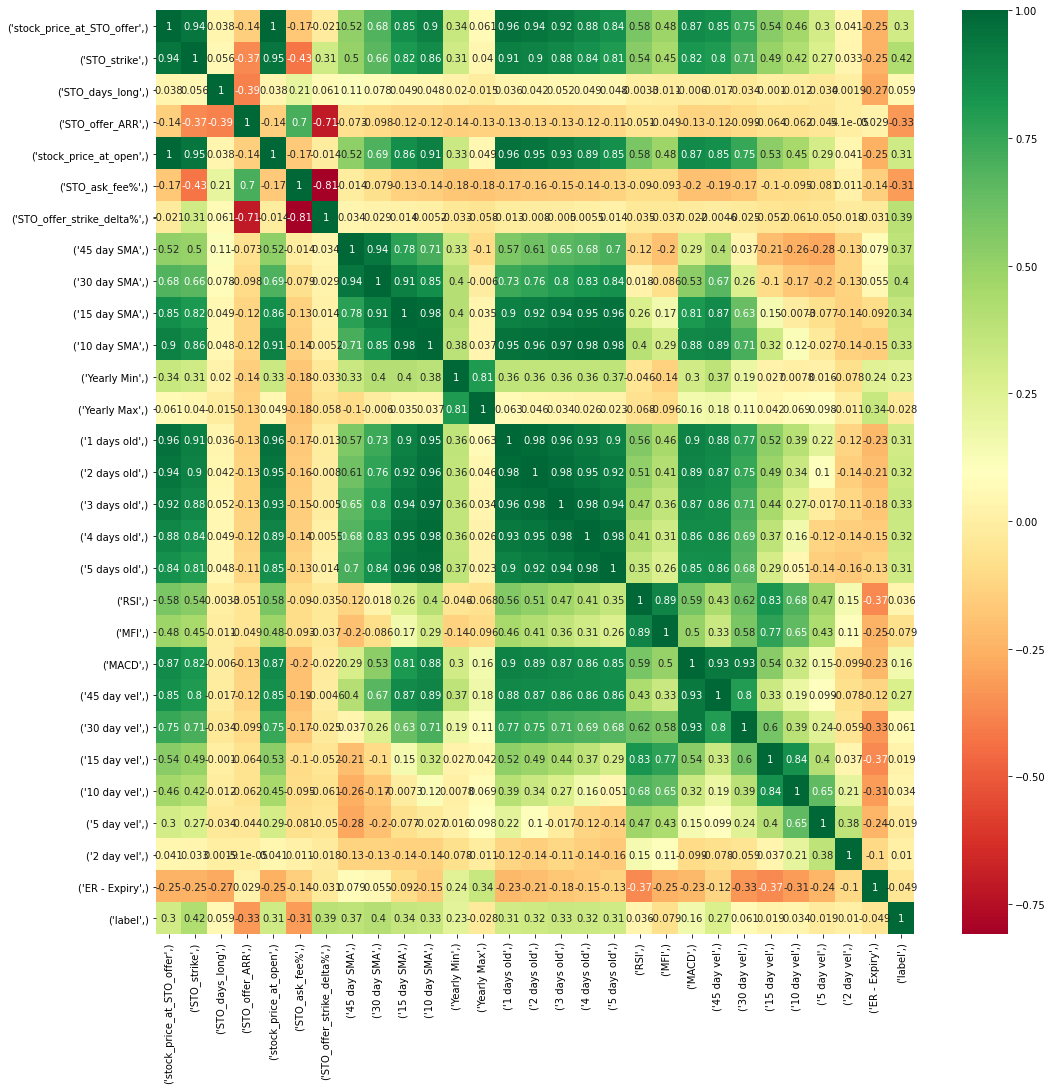

In [2]:
# Seaborn heat map
import seaborn as sb
import matplotlib.pyplot as plt

scaled_features = pd.DataFrame(features, columns = feature_columns)
corr_matrix = scaled_features.corr(method = 'pearson')
best_features = corr_matrix.index
plt.figure(figsize=(17,17))
#plot heat map
g=sb.heatmap(scaled_features[best_features].corr(),annot=True,cmap="RdYlGn")


In [3]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
print('starting selector.')
selector = selector.fit(X_train, y_train)
print('finished selector.')
print(selector.support_)   # selected features
print(selector.ranking_) # feature rank


starting selector.
finished selector.
[False  True False False False False False False  True False  True False
 False False False False False False False False  True  True False False
 False False]
[10  1 14 13  2 12 16 17  1  4  1 11 18 15  9  3 22  7  8  6  1  1 19  5
 20 21]


In [4]:
from sklearn.decomposition     import PCA

X_reduced = PCA(n_components = 2).fit(scaled_features)
print(X_reduced.components_)
print(X_reduced.explained_variance_)
print(X_reduced.explained_variance_ratio_)


[[-0.26126169 -0.25276655 -0.0130806   0.05041296 -0.26176018  0.05894832
  -0.01297848 -0.15368335 -0.20151343 -0.24934931 -0.26177637 -0.10185847
  -0.02101258 -0.26700413 -0.26591404 -0.2634617  -0.25860812 -0.25161202
  -0.15059393 -0.12241663 -0.24916621 -0.24387225 -0.21270804 -0.13550237
  -0.09303391 -0.03880332  0.0193293   0.06032311 -0.09290302]
 [-0.05226372 -0.0336444   0.02136769 -0.02462921 -0.04978515 -0.00828891
   0.04919612  0.32076323  0.28385935  0.16854072  0.10309884  0.15130444
   0.0369463  -0.01595455  0.01773441  0.05445976  0.09511165  0.12837709
  -0.3411572  -0.35138702 -0.06524116  0.03019406 -0.16129282 -0.35555006
  -0.3776353  -0.31865817 -0.14216395  0.19375394  0.12215741]]
[13.66666312  4.3831509 ]
[0.47120534 0.15112424]
X_reduced
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
